#**Using Python libraries for Handling WaPOR Data**

[![](https://raw.githubusercontent.com//wateraccounting/WaPORMOOC/main/images/colab-badge.png)](https://colab.research.google.com/github/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N02_Temporal_Aggregation.ipynb?target="_blank")

#Notebook 2 : Temporal data aggregation

In this Notebook we will show you how to do temporal aggregation of WaPOR data.  

The steps we are going to follow are:
1. Install and load necessary packages to manage rasterfiles
2. Load the .zip file from the [Download_WaPORv3_Data](https://github.com/wateraccounting/WaPORMOOC/blob/main/1_WaPOR_download_colab/Download_WaPORv3_Data.ipynb) Notebook to this session (or create a new .zip)
3. Unzip the files
4. Open and inspect one .tif file
>+Exercise 1 (answers needed for the MOOC quiz)
5. Perform the temporal aggregation (sum) of the dekadal AETI & export result to local drive
>+Exercise 2 (answers needed for the MOOC quiz)
6. More detailed temporal aggregation by date
>+Exercise 3 (answers needed for the MOOC quiz)
7. Open and inspect the result in QGIS
>+Quiz question (answer needed for the MOOC quiz)

**Data needed:**

For the exercises of the [MOOC Python for geospatial analyses using WaPOR data](https://ocw.un-ihe.org/course/view.php?id=272) you can use the following data which you can download using the [Download_WaPORv3_Data Notebook](https://github.com/wateraccounting/WaPORMOOC/blob/main/1_WaPOR_download_colab/Download_WaPORv3_Data.ipynb):
1. **Area:** Wad Helal in the Gezira Irrigation Scheme (you can find the \"Wad_Helal.geojson\" file in the data folder of [WaPORMOOC](https://github.com/wateraccounting/WaPORMOOC/tree/main/data)).
2. **Type of Data:** AETI
3. **Spatial resolution:** Level 3
4. **Temporal resolution:** dekadal
5. **Start date:** 2022-10-01
6. **End date:** 2023-04-30

 © 2024 IHE Delft Licenced under CC BY SA Creative Commons

---

### **Step 1**


In [1]:
!pip install rioxarray --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.7 MB/s eta 0:00:00


In [2]:
import os
import glob
import datetime
import xarray as xr
import rioxarray as rio
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

### **Step 2 - Create a .zip file/Upload an existing .zip files**
We will now upload a .zip file containing a series of .tif files to our session: data.zip.
   
Execute the command below and navigate to where you have saved the .zip file from Topic3_N01 in your local drive.

(If you are uploading your own .tif files, you can first create a .zip archive from these files, you may need to install compression software such as 7zip (https://www.7-zip.org/) or WinRAR (https://www.win-rar.com/) to perform this operation.)

In [3]:
#To upload file.
uploaded = files.upload()

Saving data.zip to data.zip


### **Step 3 - Unzip files**
Unzip the file you have uploaded.
The command is:
 !unzip 'file_path.zip' -d 'folder_to_unzip_path'
Replace the file name in the cell below with the name of your own file. You can find the path to your file by clicking on the 3 dots next to the file name in your file explorer to the left and selecting *Copy path*. (If you do not see your files to the left, click on the folder icon to expand the Files panel).


In [4]:
# unzip the uploaded zipfile
!unzip '/content/data.zip' -d '/content/'

Archive:  /content/data.zip
   creating: /content/content/output/
   creating: /content/content/output/L3-AETI-D/
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-06-01.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-11.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-04-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-02-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-03-21.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-01.tif  
  inflating: /content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-05-21.tif  
  inflating: /

### **Step 4 - Opening and inspecting one .tif file**
Before performing any operations let us open one of our TIFF files using the rioxarray package.

**NOTE**: all paths used in the following script are based on where the files are located when following all steps, if your data is stored elsewhere you have to update the relative path

In [5]:
# Open first raster from your unzipped files and mask out nan values
ds = rio.open_rasterio('/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif')
ds = ds.where(ds!=ds.attrs['_FillValue'])

In [6]:
# Inspect the contents - How many pixels does the raster contain?
ds

<xarray.DataArray (band: 1, y: 460, x: 754)> Size: 3MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 6kB 5.16e+05 5.16e+05 ... 5.31e+05 5.31e+05
  * y            (y) float64 4kB 1.586e+06 1.586e+06 ... 1.577e+06 1.577e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:            Area
    end_date:                 2022-10-10
    long_name:                Actual EvapoTranspiration and Interception
    number_of_days:           10
    original_units:           mm/day
    overview:                 NONE
    ...                       ...
    temporal_resolution:      Dekad
    units:                    mm/dekad
    units_conversion_factor:  10
    _FillValue:               -9999.0
    scale_factor:             1.0
    add_offset:               0.0

In [7]:
#The values contained are stored as an array with each value representing one pixel.
ds.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

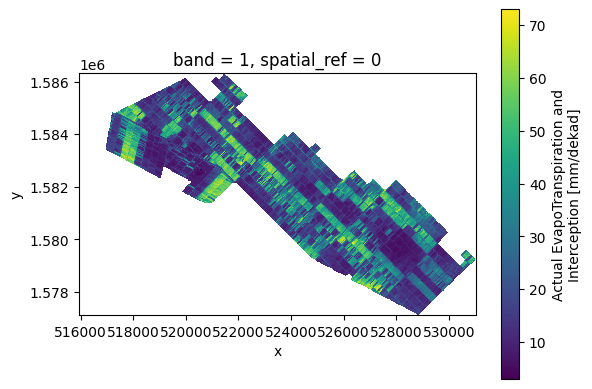

In [8]:
# We can produce a quick map of our data using the plot function
ds[0].plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [9]:
#check the min, max and mean values
print(np.nanmin(ds.values), np.nanmax(ds.values), np.nanmean(ds.values))

3.0 73.0 24.01129022520075


<div class="alert alert-success">

⚡ **EXERCISE 1**:  

Write code to find the min, max and mean for the 1st dekad of 2023

Note down the the values (rounded to the nearest integer, no decimals), you will need to enter these in the MOOC quiz.
</div>

In [ ]:
import rioxarray as rio
import numpy as np

# Open the raster file for the 1st dekad of 2023
ds = rio.open_rasterio('/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-01.tif')

# Mask out nan values
ds = ds.where(ds != ds.attrs['_FillValue'])

# Calculate the min, max, and mean
min_value = np.nanmin(ds.values)
max_value = np.nanmax(ds.values)
mean_value = np.nanmean(ds.values)

# Print the results
print(f"Min: {min_value:.0f}")
print(f"Max: {max_value:.0f}")
print(f"Mean: {mean_value:.0f}")

In [11]:
import rioxarray as rio
import numpy as np

# Open the raster file for the 1st dekad of 2023
ds = rio.open_rasterio('/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-01.tif')

# Mask out nan values
ds = ds.where(ds != ds.attrs['_FillValue'])

# Calculate the min, max, and mean
min_value = np.nanmin(ds.values)
max_value = np.nanmax(ds.values)
mean_value = np.nanmean(ds.values)

# Print the results
print(f"Min: {min_value:.0f}")
print(f"Max: {max_value:.0f}")
print(f"Mean: {mean_value:.0f}")

Min: 3
Max: 81
Mean: 32


In [12]:
## Enter your code here
#Open appropriate raster file with rioxarray and convert the nans
ds = rio.open_rasterio('/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-01.tif')
ds = ds.where(ds!=ds.attrs['_FillValue'])

# Print the min, max and mean values
print(np.nanmin(ds.values), np.nanmax(ds.values), np.nanmean(ds.values))

3.0 81.0 31.781889064265446


What happens if you do not convert the nans?

### **Step 5 - Seasonal AETI from dekadal AETI**
We will now create one raster file which contains the seasonal AETI value for our area. For this we simply need to loop through the AETI files, and add up the values.   
The glob function allows us to list files in a folder matching a specific pattern.
For example:  
`glob.glob('/content/content/output/L3-AETI-D/*.tif')  `  

will produce a list of all files with the .tif extension contained in the *L3-AETI-D* folder,
while:   
`glob.glob('/content/content/output/L3-AETI-D/*2022-10*.tif')`

will produce a list of all files with the .tif extension which also have the string *202210* in the filename - these will be all of the files from October 2022.


In [13]:
# Example to get files from October 2022
glob.glob('/content/content/output/L3-AETI-D/*2022-10*.tif')

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-21.tif']

Let's produce a seasonal file for our whole time period (this will add up all the files in the folder):

In [14]:
for i, fp in enumerate(glob.glob('/content/content/output/L3-AETI-D/*.tif')):
  fn = os.path.basename(fp)
  # OPEN DATA
  ds = rio.open_rasterio(fp)
  ds = ds.where(ds!=ds.attrs['_FillValue'])
  if i == 0:
    ds_sum = ds #Initialize sum if we are looking at the first raster
  else:
    ds_sum += ds #This is the python way of writing ds_sum = ds_sum + ds

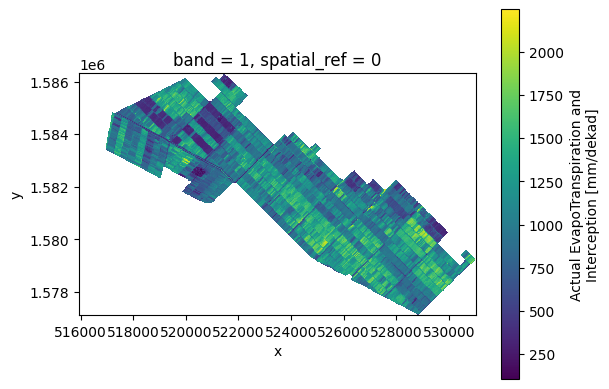

In [15]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

If we inspect the Attributes of ds_sum, you will notice they no longer correspond to our dataset - a consequence of this is the wrong legend on the map produced above - **we do not have 1200mm/dekad of AETI!** (note that if you used d_sum = d_sum + ds instead of d_sum += ds, the attributes will simply have been removed in the result).     
We can **update the Attributes** below.

In [16]:
#Inspect Attributes to see which ones we will update
attrs = ds_sum.attrs
attrs

{'AREA_OR_POINT': 'Area',
 'end_date': '2022-06-10',
 'long_name': 'Actual EvapoTranspiration and Interception',
 'number_of_days': 10,
 'original_units': 'mm/day',
 'overview': 'NONE',
 'start_date': '2022-06-01',
 'temporal_resolution': 'Dekad',
 'units': 'mm/dekad',
 'units_conversion_factor': 10,
 '_FillValue': -9999.0,
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [17]:
attrs.update({'start_date': '2022-10-01',
              'end_date': '2023-04-30',
              'units' : 'mm/season'})
del attrs['number_of_days']

ds_sum.attrs  = attrs

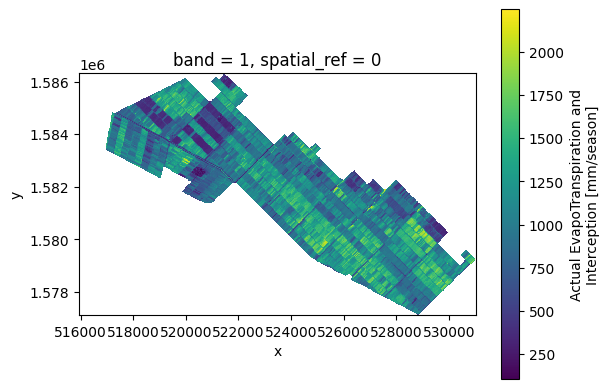

In [18]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

Save the seasonal sum to a TIFF file and download to your local drive.

**NOTE** you need this file in [Notebook 03: Calculating areal average values using WaPOR data](https://github.com/wateraccounting/WaPORMOOC/blob/main/3_Python_for_WaPOR/N03_Average_Seasonal_ET.ipynb)

In [33]:
# Save the seasonal sum to a TIFF file and download to your local drive
ds_sum.rio.to_raster("Wad_Helal_seasonal_AETI.tif")
files.download(r'/content/Wad_Helal_seasonal_AETI.tif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div class="alert alert-success">


⚡ **EXERCISE 2**:

Write code to produce the monthly sum of AETI for April 2023, find the min, max and mean

Note down the values (rounded to the nearest integer, no decimals), you will need to enter these in the MOOC quiz!

</div>

In [21]:
## Enter your code here
#Loop through the correct files to produce a sum for April 2023
import rioxarray as rio
import numpy as np
import glob
import os

# Create a list to store the data arrays for April 2023
april_data = []

# Loop through all TIFF files in the directory
for filepath in glob.glob('/content/content/output/L3-AETI-D/*.tif'):
    # Extract the date from the filename
    filename = os.path.basename(filepath)
    date_str = filename[-14:-4]

    # Check if the date is in April 2023
    if date_str.startswith('2023-04'):
        # Open the raster file and mask out nan values
        ds = rio.open_rasterio(filepath)
        ds = ds.where(ds != ds.attrs['_FillValue'])

        # Append the data array to the list
        april_data.append(ds)

# Calculate the monthly sum
monthly_sum = sum(april_data)



# Print the min, max and mean values

# Calculate the min, max, and mean
min_value = np.nanmin(monthly_sum.values)
max_value = np.nanmax(monthly_sum.values)
mean_value = np.nanmean(monthly_sum.values)

# Print the results
print(f"Min: {min_value:.0f}")
print(f"Max: {max_value:.0f}")
print(f"Mean: {mean_value:.0f}")


Min: 7
Max: 186
Mean: 35


In [20]:
# Example to get files from October 2022
glob.glob('/content/content/output/L3-AETI-D/*2023-04*.tif')

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-11.tif']

### **Step 6** - More detailed temporal aggregation
So far we have done aggregation for:
1.   all files available
2.   all files with an easily recognisable pattern in the file name     

We will now learn how to select **only files within a specified time period**, for example between the start and end of season.

To do this we will:


1.   Obtain a list of all dates for the availabile files as datetime objects
2.   Define a start and end date
3.   Select only files names for which the date falls between the start and end dates

To start we will get a list of the filenames and extract the date from the name: you can observe that the date is contained in the last 10 characters before the file extension.


In [22]:
fnames = glob.glob('/content/content/output/L3-AETI-D/*.tif')
fnames

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-06-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-04-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-02-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-03-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-05-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-03-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-04-21.tif',
 '/content/content/o

Let's see how we can isolate the date on one filename:

In [23]:
path1 = fnames[0]
path1

'/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-06-01.tif'

You should see a path that looks something like:     

`/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-21.tif`

We want to extract the date, e.g. in this case: '2022-11-21'     
Because all of the file names have the same formatting, ending with the date and .tif, we can simply extract the corresponding characters by counting their position from the end of the string:    
*   the date is located between the character located 14 positions from the end, and the character located 4 positions from the end.





In [24]:
date0 = path1[-14:-4] #[-14:-4] selects characters in the string: starts at the 14th from the end, to 4th from the end
print(date0)

2022-06-01


This is now a *string*. In oder to be able to do operations and comparisons between dates, we need to convert it to a datetime object. We can use the datetime library for this.
The datetime.strptime function allows us to go from a string to a datetime object, you can read the documentation [here](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior).

In [25]:
date0 =  datetime.datetime.strptime(date0, '%Y-%m-%d')
date0

datetime.datetime(2022, 6, 1, 0, 0)

We can now produce a list with all the dates corresponding to our filenames:

In [26]:
file_dates = []
for path0 in fnames:
  date0 = datetime.datetime.strptime(path0[-14:-4], '%Y-%m-%d')
  file_dates.append(date0)

In [27]:
file_dates

[datetime.datetime(2022, 6, 1, 0, 0),
 datetime.datetime(2023, 1, 11, 0, 0),
 datetime.datetime(2022, 4, 21, 0, 0),
 datetime.datetime(2022, 2, 21, 0, 0),
 datetime.datetime(2022, 10, 1, 0, 0),
 datetime.datetime(2022, 3, 21, 0, 0),
 datetime.datetime(2023, 4, 1, 0, 0),
 datetime.datetime(2022, 5, 21, 0, 0),
 datetime.datetime(2022, 3, 11, 0, 0),
 datetime.datetime(2023, 4, 21, 0, 0),
 datetime.datetime(2022, 11, 21, 0, 0),
 datetime.datetime(2022, 9, 21, 0, 0),
 datetime.datetime(2022, 9, 11, 0, 0),
 datetime.datetime(2023, 4, 11, 0, 0),
 datetime.datetime(2022, 5, 11, 0, 0),
 datetime.datetime(2022, 2, 11, 0, 0),
 datetime.datetime(2022, 1, 21, 0, 0),
 datetime.datetime(2022, 3, 1, 0, 0),
 datetime.datetime(2022, 12, 21, 0, 0),
 datetime.datetime(2022, 11, 11, 0, 0),
 datetime.datetime(2022, 4, 1, 0, 0),
 datetime.datetime(2022, 12, 1, 0, 0),
 datetime.datetime(2022, 7, 21, 0, 0),
 datetime.datetime(2023, 1, 21, 0, 0),
 datetime.datetime(2022, 7, 11, 0, 0),
 datetime.datetime(2022, 2

We now have a list of datetimes. Note that this can be done more succintly with the following command:


```
[fname[-14:-4] for d in fnames]
```

We will now define the start and end dates of our season and find the files which are located between these dates:



In [28]:
sos = datetime.datetime(2022,10,1) #start of season date, we use datetime.datetime to convert the year, month, day to a datetime object
eos = datetime.datetime(2023,2,28) #end of season date

Finally, we will check which dates from our list fall between the start and end date so we can select only the filenames corresponding to our season.      

**Note**: this is a simplified code and it does not a) Check whether all files from the season are present b) Deal with seasons which do not start and end at the beginning and end of a dekad

In [29]:
selected_files = []
for i, date in enumerate(file_dates):
  if (date >= sos and date < eos):
    selected_files.append(fnames[i])
selected_files

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-02-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-01.tif',
 '/content/content/o

It can be hard to check if all the files you want are there as they are not sorted, to adjust this you can simply run the following:

In [30]:
sorted(selected_files)

['/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-10-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-11-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-01.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-11.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2022-12-21.tif',
 '/content/content/output/L3-AETI-D/Wad_Helal.GEZ_L3-AETI-D_NONE_dekad_converted_2023-01-01.tif',
 '/content/content/o

In [31]:
mask = [(ds >= sos and ds < eos) for ds in file_dates]
fnames_array = np.array(fnames)
selected_files = fnames_array[mask]

If you are interested, another, more elegant way to achieve this result can be done with the following code:
```
mask = [(ds >= sos and ds < eos) for ds in file_dates]
fnames_array = np.array(fnames)
selected_files = fnames_array[mask]
```



<div class="alert alert-success">

⚡ **BONUS**:

Write code to produce the sum of AETI for the period between 21/01/2023 and 10/04/2023, find the min, max and mean



</div>

In [ ]:
## Enter your code here
#Create the list of files for the season between 21/01/2023 and 10/04/2023



#Compute the sum



# Print the min, max and mean values


In [32]:
import rioxarray as rio
import numpy as np
import glob
import os
import datetime

# Define the start and end dates
start_date = datetime.datetime(2023, 1, 21)
end_date = datetime.datetime(2023, 4, 10)

# Create a list to store the data arrays for the specified period
selected_data = []

# Loop through all TIFF files in the directory
for filepath in glob.glob('/content/content/output/L3-AETI-D/*.tif'):
    # Extract the date from the filename
    filename = os.path.basename(filepath)
    date_str = filename[-14:-4]
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d')

    # Check if the date is within the specified period
    if start_date <= date <= end_date:
        # Open the raster file and mask out nan values
        ds = rio.open_rasterio(filepath)
        ds = ds.where(ds != ds.attrs['_FillValue'])

        # Append the data array to the list
        selected_data.append(ds)

# Calculate the sum for the period
period_sum = sum(selected_data)

# Calculate the min, max, and mean
min_value = np.nanmin(period_sum.values)
max_value = np.nanmax(period_sum.values)
mean_value = np.nanmean(period_sum.values)

# Print the results
print(f"Min: {min_value:.0f}")
print(f"Max: {max_value:.0f}")
print(f"Mean: {mean_value:.0f}")

Min: 23
Max: 648
Mean: 275


**Review the data in QGIS**

Open the seasonal AETI file you have downloaded in QGIS as well as the shapefile for the area.  


<div class="alert alert-success">

⚡ **Quiz questions**:
  
1. What difference did you notice between the geojson vector file and the raster file from WaPOR?
>a.   The raster file is shifted     
b.   The polygon has a larger extent than the raster.    
c.   The raster has a larger extent than the polygon       

2. To what do you think this difference can be attributed to?
>a.   The raster and geojson have different projections     
b.   The WaPOR L3 data does not cover the whole extent of the geojson file.    
c.   The raster and geojson have different spatial resolutions    

⚡ You will need the answers to these questions in the MOOC Quiz

</div>

1. B
2. B